In [ ]:
import requests ## Importation des librairies nécessaires
import bs4
import pandas as pd

url_home = "https://pokemondb.net/pokedex/national"

response = requests.get(
    url_home,
    headers={"User-Agent": "Python for data science tutorial"}
)

page = bs4.BeautifulSoup(response.content, "lxml")

print(page.title.text)

In [ ]:
## Fonction qui télécharge la page HTML d’un Pokémon et la transforme en objet BeautifulSoup
def get_name(nom_pokemon): ## Remplir le nom du pokemon voulu
    url = "https://pokemondb.net/pokedex/" + nom_pokemon
    response = requests.get(url)
    return bs4.BeautifulSoup(response.text, "lxml")

In [ ]:
## Test en affichant le titre de la page bulbasaur
page_bulba = get_name("bulbasaur")
print(page_bulba.title.text)

In [ ]:
## Fonction extraire_stats qui permet d'extraire toutes les infos des 4 tableaux sur la page du pokemon
def extraire_stats(page_pokemon):
    tableaux = page_pokemon.find_all("table", {"class": "vitals-table"})[:4] 
    stats = {} ## Création d'un dictionnaire vide 

    for table in tableaux:
        lignes = table.find_all("tr")
        for ligne in lignes:
            th = ligne.find("th")  # nom de la ligne
            td = ligne.find("td")  # valeur

            if th and td:
                nom = th.text.strip()
                valeur = td.text.strip()
                stats[nom] = valeur

    return stats ## Retourne dans le dictionnaire stats

In [ ]:
## Test avec la page de bulbasaur
stats_bulba = extraire_stats(page_bulba)
stats_bulba

In [ ]:
liens = page.find_all("a", {"class": "ent-name"}) ## Liens récupère toute les balises "a" pour avoir tous les noms de pokemon
liste_noms = [a.text.lower() for a in liens] ## Liste_noms permet d'avoir la liste de tous les noms en minuscule
print(liens)             
print(liste_noms[:10])   # limite aux 10 premiers pour pas tout afficher
print(len(liste_noms))   # Voir si le nombre total est correct

In [ ]:
## Cette fonction récupère toutes les informations d'un pokemon à partir de son nom 
def infos_pokemon(nom):
    page = get_name(nom)
    stats = extraire_stats(page)
    stats["name"] = nom       # on ajoute le nom du pokémon
    return stats

In [ ]:
liste_finale = []  ## Création d'une liste pour récupérer le dictionnaire de chaque pokemon

for nom in liste_noms[:10]:  ## Boucle qui récupère les informations des 10 premiers pokemon
    print("Récupération pour", nom) 
    liste_finale.append(infos_pokemon(nom)) ##Ajoute les données dans liste_finale en exécutant la fonction infos_pokemon

print(liste_finale) ## Vérification 

In [17]:
df = pd.DataFrame(liste_finale)
df

,National №,Type,Species,Height,Weight,Abilities,Local №,EV yield,Catch rate,Base Friendship,...,Gender,Egg cycles,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,name
0,0001,Grass Poison,Seed Pokémon,0.7 m (2′04″),6.9 kg (15.2 lbs),1. OvergrowChlorophyll (hidden ability),0001 (Red/Blue/Yellow)0226 (Gold/Silver/Crysta...,1 Sp. Atk,"45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",45,49,49,65,65,45,318,bulbasaur
1,0002,Grass Poison,Seed Pokémon,1.0 m (3′03″),13.0 kg (28.7 lbs),1. OvergrowChlorophyll (hidden ability),0002 (Red/Blue/Yellow)0227 (Gold/Silver/Crysta...,"1 Sp. Atk, 1 Sp. Def","45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",60,62,63,80,80,60,405,ivysaur
2,0003,Grass Poison,Seed Pokémon,2.0 m (6′07″),100.0 kg (220.5 lbs),1. OvergrowChlorophyll (hidden ability),0003 (Red/Blue/Yellow)0228 (Gold/Silver/Crysta...,"2 Sp. Atk, 1 Sp. Def","45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",80,82,83,100,100,80,525,venusaur
3,0004,Fire,Lizard Pokémon,0.6 m (2′00″),8.5 kg (18.7 lbs),1. BlazeSolar Power (hidden ability),0004 (Red/Blue/Yellow)0229 (Gold/Silver/Crysta...,1 Speed,"45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",39,52,43,60,50,65,309,charmander
4,0005,Fire,Flame Pokémon,1.1 m (3′07″),19.0 kg (41.9 lbs),1. BlazeSolar Power (hidden ability),0005 (Red/Blue/Yellow)0230 (Gold/Silver/Crysta...,"1 Sp. Atk, 1 Speed","45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",58,64,58,80,65,80,405,charmeleon
5,0006,Fire Flying,Flame Pokémon,1.7 m (5′07″),90.5 kg (199.5 lbs),1. BlazeSolar Power (hidden ability),0006 (Red/Blue/Yellow)0231 (Gold/Silver/Crysta...,3 Sp. Atk,"45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",78,84,78,109,85,100,534,charizard
6,0007,Water,Tiny Turtle Pokémon,0.5 m (1′08″),9.0 kg (19.8 lbs),1. TorrentRain Dish (hidden ability),0007 (Red/Blue/Yellow)0232 (Gold/Silver/Crysta...,1 Defense,"45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",44,48,65,50,64,43,314,squirtle
7,0008,Water,Turtle Pokémon,1.0 m (3′03″),22.5 kg (49.6 lbs),1. TorrentRain Dish (hidden ability),0008 (Red/Blue/Yellow)0233 (Gold/Silver/Crysta...,"1 Defense, 1 Sp. Def","45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",59,63,80,65,80,58,405,wartortle
8,0009,Water,Shellfish Pokémon,1.6 m (5′03″),85.5 kg (188.5 lbs),1. TorrentRain Dish (hidden ability),0009 (Red/Blue/Yellow)0234 (Gold/Silver/Crysta...,3 Sp. Def,"45 (5.9% with PokéBall, full HP)",50 (normal),...,"87.5% male, 12.5% female","20\t\t\t\t(4,884–5,140 steps)",79,83,100,85,105,78,530,blastoise
9,0010,Bug,Worm Pokémon,0.3 m (1′00″),2.9 kg (6.4 lbs),1. Shield DustRun Away (hidden ability),0010 (Red/Blue/Yellow)0024 (Gold/Silver/Crysta...,1 HP,"255 (33.3% with PokéBall, full HP)",50 (normal),...,"50% male, 50% female","15\t\t\t\t(3,599–3,855 steps)",45,30,35,20,20,45,195,caterpie


In [ ]:
!pip install scikit-image
!pip install matplotlib

In [ ]:
import shutil
import os

from skimage import io
import matplotlib.pyplot as plt

In [ ]:
dossier = "images_pokemon" ## Création d'un dossier pour mettre les photos

if not os.path.exists(dossier): 
    os.makedirs(dossier)

In [ ]:
def telecharger_image(nom_pokemon):
    url = f"https://img.pokemondb.net/artwork/{nom_pokemon}.jpg" ## Permet de récupérer le lien de l'image grace au nom de chaque pokemon
    chemin = f"{dossier}/{nom_pokemon}.jpg"  ## Indique le chemin où l'image est placée 

    r = requests.get(url) ## Télécharge le contenu de l'url 

    if r.ok: 
        with open(chemin, "wb") as f: ## L'image est placée dans le dossier images-pokemon
            f.write(r.content)
        print("Image téléchargée :", chemin) ## Si le téléchargement c'est bien passé dire image téléchargé avec le chemin
    else:
        print("Erreur :", nom_pokemon) ## Sinon Erreur avec le nom du pokemon

    return chemin

In [ ]:
premiers = liste_noms[:5] ## Prend uniquement les 5 premiers pokemons 
chemins_images = [] ## Création d'une liste pour stocker le chemin des images téléchargées

for nom in premiers: ## Création d'une boucle qui ajoute l'image des 5 premiers pokemons dans le dossier images_pokemon
    chemin = telecharger_image(nom) 
    chemins_images.append(chemin) 


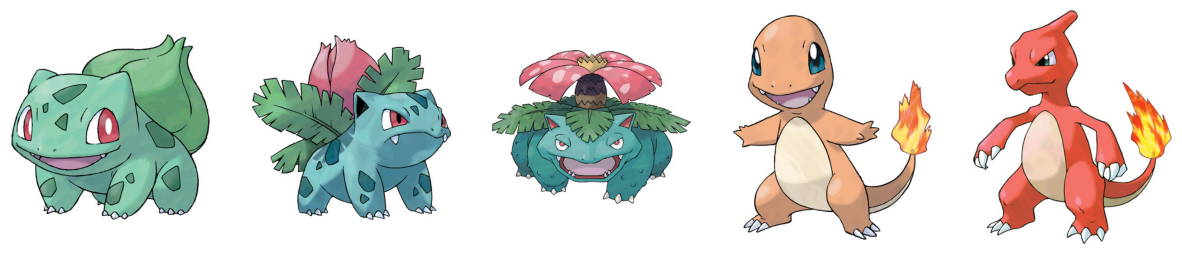

Les premiers pokemon du Pokedex


In [18]:
plt.figure(figsize=(15, 4))

for i, chemin in enumerate(chemins_images):
    img = io.imread(chemin)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()
print("Les premiers pokemon du Pokedex")